# Interpolación polinómica #

### Luis Ardévol Mesa ###

## Introducción ##

En este programa se pretende realizar y aplicar dos métodos numéricos en concreto: la interpolación por el método de Lagrange y por el método de Newton. Para ello, primero se programarán ambos métodos y se aplicarán al caso de una función matemática conocida que se presentará más adelante. Posteriormente, habiendo ya verificado el buen funcionamiento, se aplicará uno de ellos a la interpolación de unos datos de irradiancia solar dados. En ambas aplicaciones se calculará el error cometido en la interpolación de los puntos, lo que servirá para el análisis de los resultados.

## Método ##

En primer lugar, se programarán las interpolaciones de Lagrange y Newton. Como comprobación, se elegirán los nodos usando la función 
\begin{equation}
f(t) = e^{0.2t}sin(t)
\end{equation} 
Se comparará el resultado de la interpolación en una serie de puntos con los valores reales de $f(t)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(t):
  return np.exp(0.2*t) * np.sin(t) #argumento en radianes

Sea un conjunto de valores $\{x_i, f(x_i)\}_{i=0}^n\in \mathbb{R}$ con $x_i$ representando la abscisa y $f(x_i)$ la ordenada. Se trata de encontrar un polinomio $p(x)$ tal que $p(x_i) = f(x_i)$. Este polinomio existe y es único entre los polinomios de grado menor o igual a n. El polinomio interpolador en la forma de Lagrange tiene la forma
\begin{equation}
p_n(x) = \sum_{i=0}^n f(x_i)l_{in}(x)
\end{equation}
y depende de los polinomios $l_{in}(x)$, que dependen tanto del nodo de interpolación como del número de nodos y toman la forma
\begin{equation}
l_{in}(x) = \frac{\displaystyle\prod_{j=0(j\neq i)}^n (x - x_j)}{\displaystyle\prod_{j=0(j\neq i)}^n (x_i - x_j)}
\end{equation}
Para hallar el polinomio, se crea la siguiente función de forma que se pueda introducir un conjunto de valores y que sea capaz de devolver la interpolación de cada uno. 

In [ ]:
def lagrange(a, b, x): #a = abscisa ; b = ordenada ; x = puntos a interpolar
  sum = 0
  for i in range(len(a)):
    prod = 1 
    for j in range(len(a)):
      if (j!=i):
        prod *= (x - a[j])/(a[i] - a[j]) #polinomio l_in(x)
    sum += prod * b[i] #polinomio p_n(x)
  return sum

Existen varias formas de evaluar el polinomio interpolador a pesar de su unicidad. El método de Lagrange presenta el problema de que al añadir un nuevo punto al problema inicial, no existe una relación sencilla entre el nuevo polinomio y el anterior. Es por eso que surge la fórmula de interpolación de Newton como opción para añadir nuevos puntos si multiplicar esfuerzo computacional. 
\begin{equation}
p_n(x) = p_{n-1}(x) + q_n(x) = p_{n-1}(x) + f[x_n, ..., x_0](x - x_0)(x - x_1)...(x - x_{n-1})
\end{equation}
siendo $p_{n-1}(x)$ el polinomio interpolador sobre los puntos $x_0, ..., x_{n-1}$, $q_n(x)$ un polinomio de grado $\leq n$, $f[x_n, ..., x_0]$ una diferencia dividada y el polinomio $p_n(x)$ el nuevo polinomio interpolador tras añadir un nuevo punto al problema inicial. \\

En este caso se pretende calcular el polinomio desde cero y compararlo con el obtenido por el método de Lagrange, por lo que adaptamos la fórmula vista anteriormente de forma que, en término de las diferencias divididas, el polinomio tendrá la forma
\begin{equation}
p_n(x) = f[x_0] + \sum_{i=1}^n \left(f[x_0, ..., x_i]\cdot \prod_{j=0}^{n-1} (x - x_j) \right)
\end{equation}
Para esto, la función $\textit{Newton}$, que requiere que se le introduzcan los mismos parámetros que a la función $\textit{Lagrange}$, evaluará la interpolación de las puntos dados construyendo una matriz cuadrada $n \times n$ para las diferencias divididas, siendo n el número de abcisas u ordenadas que se introduzcan. A continuación se hace un esbozo de dicha matriz para el caso de 4 puntos
\begin{equation}
  \begin{matrix}
    x_0 \\
    x_1 \\
    x_2 \\
    x_3
  \end{matrix}
  \begin{pmatrix}
    f[x_0] & 0 & 0 & 0 \\
    f[x_1] & \frac{f[x_1]-f[x_0]}{x_1 - x_0} \equiv a_{11} & 0 & 0 \\
    f[x_2] & \frac{f[x_2]-f[x_1]}{x_2 - x_1} \equiv a_{21} & \frac{a_{21} - a_{11}}{x_2 - x_0} \equiv a_{22} & 0 \\
    f[x_3] & \frac{f[x_3]-f[x_2]}{x_3 - x_2} \equiv a_{31} & \frac{a_{31} - a_{21}}{x_3 - x_1} \equiv a_{32} & \frac{a_{32} - a_{22}}{x_3 - x_0} \equiv a_{33}
  \end{pmatrix}
\end{equation}
donde los términos que interesan para construir el polinomio visto en el párrado anterior son los términos de la diagonal. Se ve que esta matriz se debe construir por columnas y que cada término vendrá dado por
\begin{equation}
a_{j,i} = \frac{a_{j,i-1} - a_{j-1,i-1}}{x_j - x_{j-1}}
\end{equation}
Todo esto queda recogido en la siguiente función, que devolverá tanto la matriz como la interpolación de los puntos


In [ ]:
def Newton(a, b, x): 
  sum, prod = b[0], 1 #el primer elemento del polinomio es únicamento f(x0)
  m = np.zeros((len(a),len(a))) 
  m[:,0] = b #primera columna de la matriz son los f(xi)
  for i in range(1, len(a)):
    for j in range(i, len(a)):
      m[j,i] = (m[j,i-1] - m[j-1,i-1])/(a[j] - a[j-i]) #elemento de matriz a_{j,i}
    prod *= (x - a[i-1]) 
    sum += prod * m[i,i] #construcción del polinomio
  return sum, m

Definidos ya los métodos de interpolación a usar, solo queda aplicarlos a la función matemática conocida previamente $f(t)$. Para ello, se necesitan un conjunto de abcisas $x_i$ y sus respectivas ordenadas $f(x_i)$, que serán los nodos, y además de un conjunto de puntos a interpolar (p), que se escojerán de forma aleatorio dentro del intervalo en el que se encuentran las abcisas proporcionadas. \\

Se ha elegido una intervalo en el que la función presenta un rango de valores en ordenadas comparable a los de abcisas, ya que la $f(t)$ aumenta muy rápidamente su amplitud de oscilación. Esto no presenta un problema para la interpolación, pero hace que visualmente no quede tan llamativa como en el intervalo seleccionado.

In [ ]:
#nodos
xi0 = np.arange(-6, 6, 1.75)
fi0 = func(xi0)

#200 puntos aleatorios a interpolar
p0 = np.array(sorted(np.round(np.random.uniform(np.amin(xi0), np.amax(xi0), size=200), decimals=2))) 

Adicionalmente, creamos una función que nos permita comprobar más adelante si el error obtenido a partir de la diferencia entre los datos reales y los interpolados coincide con el error cometido en la interpolación calculado por otro método (tenemos en cuenta la diferencia que habrá por el mismo cálculo computacional, que será de una potencia muy pequeña). 

In [ ]:
def comprobacion(a, b, c): 
  for i in range(len(a)):
    if (np.abs((b[i] - c[i]) - a[i]) > 1*10**-10): #comparación error real - error interpolado
      return print("Revisa eso :/")
      break
  return print("Parece bien hecho")

## Resultados y análisis ##

Como el polinomio interpolador es único, el valor f(x) obtenido para los puntos debe ser el mismo, por lo que ambos arrays deben ser idénticos. Otra forma de comprobarlo sería restando ambos arrays de forma que se obtenga un array de 0, o la suma de los elementos del array diferencia entre ambos debe ser 0. Aquí tomamos en consideración que existirá un error de precisión muy pequeño debido a como se procesa cada método. Sumamos en valor absoluto para evitar que errores negativos se anulen con positivos y de una confirmación errónea

In [ ]:
if (sum(np.abs(lagrange(xi0, fi0, p0) - Newton(xi0, fi0, p0)[0])) <= 1*10**-10): #comparación
  print("Parece bien hecho")
else:
  print("Revisa eso :/")

Parece bien hecho


De esta forma queda verificado el buen proceder en ambos métodos ya que como era de esperar, obtenemos los mismos valores aplicando ambos métodos como consecuencia de la unicidad del polinomio interpolador. Otra forma de verificarlo sería la representación gráfica de la interpolación por cada método frente a la función real $f(t)$.

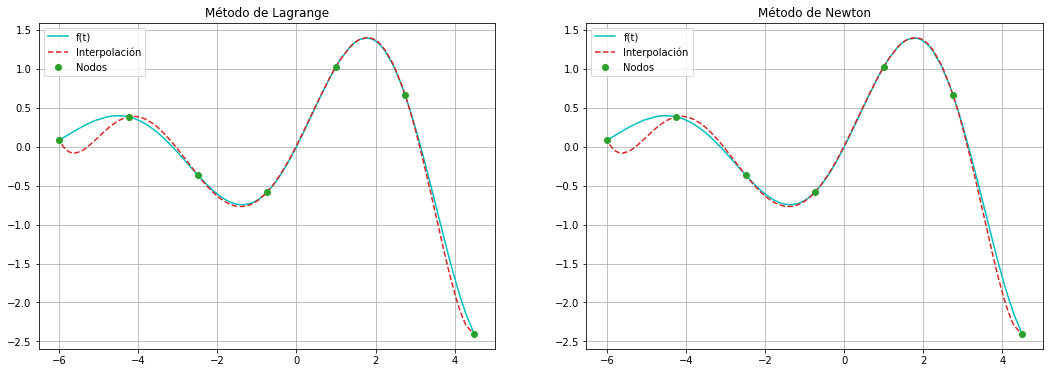

In [ ]:
fig1, ax1 = plt.subplots(1, 2, figsize=(18, 6))  

ax1[0].plot(p0, func(p0), label="f(t)", c='c') #función verdadera
ax1[0].plot(p0, lagrange(xi0, fi0, p0), label="Interpolación", color='tab:red', linestyle='dashed') #interpolación de Lagrange
ax1[0].plot(xi0, fi0, 'o' , label="Nodos",color='tab:green') #nodos
ax1[0].set_title('Método de Lagrange')
ax1[0].legend()
ax1[0].grid()

ax1[1].plot(p0, func(p0), label="f(t)", c='c') #función verdadera
ax1[1].plot(p0, Newton(xi0, fi0, p0)[0], label="Interpolación", color='tab:red', linestyle='dashed') #interpolación de Newton
ax1[1].plot(xi0, fi0, 'o' , label="Nodos",color='tab:green') #nodos
ax1[1].set_title('Método de Newton')
ax1[1].legend()
ax1[1].grid()

Se ve como a pesar de haber dado muy pocos nodos, la función interpolada se ajusta correctamente a $f(t)$ en torno al 0, presentando un comportamiento distinto al esperado solo en los extremos de la representación. Así, vemos como la interpolación tiende a la función $f(t)$. \\

Dando algunos nodos más se debería poder corregir este comportamiento en los extremos si realmente la interpolación tiene a $f(t)$.

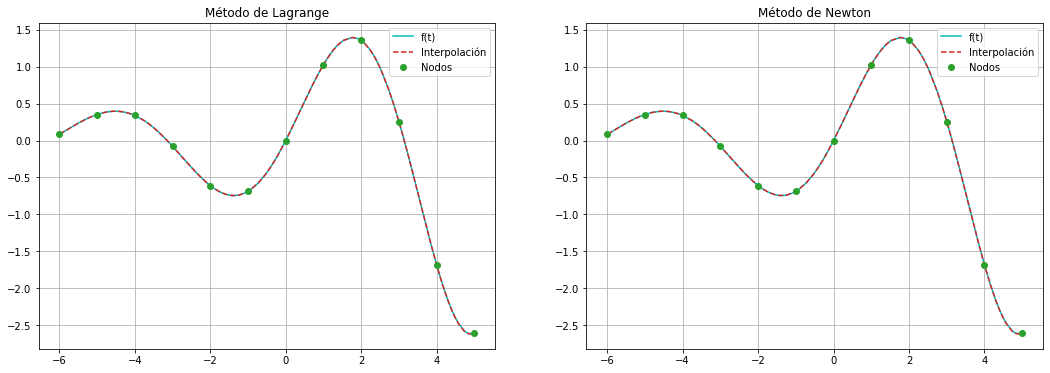

In [ ]:
#nuevos nodos
xi = np.arange(-6, 6, 1)
fi = func(xi)
#200 puntos aleatorios a interpolar
p = np.array(sorted(np.round(np.random.uniform(np.amin(xi), np.amax(xi), size=200), decimals=2)))

#representamos igual que antes, cambiando solo los nodos y los puntos a interpolar
fig2, ax2 = plt.subplots(1, 2, figsize=(18, 6)) 

ax2[0].plot(p, func(p), label="f(t)", c='c')
ax2[0].plot(p, lagrange(xi, fi, p), label="Interpolación", color='tab:red', linestyle='dashed')
ax2[0].plot(xi, fi, 'o' , label="Nodos",color='tab:green') 
ax2[0].set_title('Método de Lagrange')
ax2[0].legend()
ax2[0].grid()

ax2[1].plot(p, func(p), label="f(t)", c='c')
ax2[1].plot(p, Newton(xi, fi, p)[0], label="Interpolación", color='tab:red', linestyle='dashed')
ax2[1].plot(xi, fi, 'o' , label="Nodos",color='tab:green') 
ax2[1].set_title('Método de Newton')
ax2[1].legend()
ax2[1].grid()

En efecto, añadiendo solo 5 nodos hemos sido capaces de corregir el mal comportamiento en los extremos, haciendo que la interpolación tienda a $f(t)$ en todo el intervalo representado. Cabe destacar que se ha elegido una función continua en $\mathbb{R}$ y además seleccionando el intervalo en el que los valores de x e y son comparables, ya que para x mayores, como ya se mencionó anteriormente, la amplitud de oscilación se hace muy grande.

### Error ###

A continuación procede calcular el error que se está cometiendo en la interpolación de estos últimos puntos p (tanto por exceso como por defecto). La forma más sencilla es restar el valor verdadero, que se sabe ya que se dispone de la función $f(t)$, al valor interpolado

In [ ]:
print(func(p) - Newton(xi, fi, p)[0])

[ 0.00000000e+00  7.47999058e-05  1.08958775e-04  2.22506955e-04
  2.98527552e-04  3.27795918e-04  3.46037820e-04  3.47982464e-04
  3.41463423e-04  3.21916507e-04  2.87453041e-04  2.63601318e-04
  2.50834546e-04  1.39071873e-04  3.33175414e-05  0.00000000e+00
 -1.96934953e-05 -7.63255236e-05 -7.86681986e-05 -8.48711435e-05
 -8.66675197e-05 -9.36768617e-05 -9.63638318e-05 -9.78759141e-05
 -8.97623058e-05 -8.85214512e-05 -6.91626850e-05 -6.72587983e-05
 -6.33564040e-05 -6.13629962e-05 -1.53104294e-05  1.01901864e-05
  1.62398472e-05  3.03302849e-05  3.55601699e-05  3.71202802e-05
  3.85774500e-05  3.94304794e-05  3.94825898e-05  3.78343889e-05
  3.41044369e-05  2.86999846e-05  2.12184522e-05  1.94216534e-05
  1.85107179e-05  1.38683526e-05  1.29288228e-05  8.22534323e-06
  8.22534323e-06  7.28955591e-06  3.59057526e-06  2.68085838e-06
  2.68085838e-06 -1.73974735e-06 -6.67170774e-06 -7.44528683e-06
 -1.24017196e-05 -1.53918427e-05 -1.87144622e-05 -1.91025825e-05
 -2.15875876e-05 -2.21058

Sin embargo, se necesita una forma de calcular dicho error si no se dispone de la función verdadera. Se puede hacer este cálculo haciendo uso de las diferencias divididas. \\

Sea $p_n(x)$ el polinomio interpolador de una cierta función $f(x)$ sobre los puntos $x_n, ..., x_0$. El error en la interpolación $e(x) = f(x) - p_n(x)$ puede ponerse de la forma

\begin{equation}
    e(x) = f[x, x_n, ..., x_0](x - x_0)(x - x_1)...(x - x_n)
\end{equation}

Es decir, para calcular el error de un punto dado p, basta con añadir el punto p al conjunto de abcisas $\{x_i\}$, y añadir a la matriz de diferencias dividas ya calculada una fila adicional por debajo. El último coeficiente de esta fila será el necesario para calcular e(x). \\

Para implimentarlo en el programa, no es necesario acudir a la matriz completa de nuevo, solo es necesaria la última fila de la matriz ya calculada. Se construirá un array con las abcisas y el punto del cual queremos el error, y otro array que será la fila a añadir. De este modo, el cálculo de los coeficientes que irán en este útlimo array seguirá el mismo procedimiento ya visto el realizar el método de Newton

In [ ]:
def error(a, b, x, fx):
  fila = Newton(a, b, x)[1][-1,:] #última fila matriz original
  errores = np.array([]) #errores de cada punto
  for k in range(len(x)): 
    c = np.append(a, x[k]) #nuevo array abcisas
    fa = np.array([fx[k]]) #fila añadida a la matriz original
    prod = 1
    for i in range(1, len(c)):
      if ((c[-1] - c[-1-i]) == 0): #evitamos los valores 'nan' (divisiones por 0, cuando coincide el punto con un nodo)
        fa = np.append(fa, 0)
      else:
        termino = (fa[i-1] - fila[i-1])/(c[-1] - c[-1-i]) #elemento de matriz (diferencia dividada)
        fa = np.append(fa, termino)
    for i in range(len(a)): #productorio (x - x_i)
      prod *= (x[k] - a[i]) 
    errores = np.append(errores, (fa[-1]*prod))
  return errores
print(error(xi, fi, p, func(p)))

[-0.00000000e+00  7.47999058e-05  1.08958775e-04  2.22506955e-04
  2.98527552e-04  3.27795918e-04  3.46037820e-04  3.47982464e-04
  3.41463423e-04  3.21916507e-04  2.87453041e-04  2.63601318e-04
  2.50834546e-04  1.39071873e-04  3.33175414e-05 -0.00000000e+00
 -1.96934954e-05 -7.63255236e-05 -7.86681986e-05 -8.48711435e-05
 -8.66675198e-05 -9.36768618e-05 -9.63638319e-05 -9.78759141e-05
 -8.97623058e-05 -8.85214512e-05 -6.91626850e-05 -6.72587983e-05
 -6.33564040e-05 -6.13629962e-05 -1.53104294e-05  1.01901864e-05
  1.62398472e-05  3.03302849e-05  3.55601699e-05  3.71202802e-05
  3.85774499e-05  3.94304794e-05  3.94825898e-05  3.78343889e-05
  3.41044369e-05  2.86999846e-05  2.12184522e-05  1.94216534e-05
  1.85107179e-05  1.38683526e-05  1.29288228e-05  8.22534323e-06
  8.22534323e-06  7.28955591e-06  3.59057526e-06  2.68085837e-06
  2.68085837e-06 -1.73974735e-06 -6.67170774e-06 -7.44528683e-06
 -1.24017197e-05 -1.53918427e-05 -1.87144622e-05 -1.91025825e-05
 -2.15875876e-05 -2.21058

Si comparamos con el error obtenido anteriormente a partir de la función real, seguimos el mismo razonamiento hecho al comparar los resultados obtenidos por el método de Lagrange y por el de Newton.

In [ ]:
print(comprobacion(error(xi, fi, p, func(p)), func(p), Newton(xi, fi, p)[0]))

Parece bien hecho
None


### Irradiancia solar ###

Una vez tenemos comprobado que el método funciona correctamente, conviene aplicarlo a un caso "real" (ya que ambos dan el mismo resultado no es necesario aplicar ambos métodos, en lo que sigue se procederá únicamente con el método de Newton). Se nos proporcionan los siguientes datos de irradiancia solar simulados en un punto del norte de Tenerife. El primer vector corresponde a la irradiancia simulada en vatios por metro cuadrado y el segundo contiene las horas correspondientes, cada 10 minutos. Se ha supuesto que no existen nubes.

In [ ]:
irrad_clear = np.array([0.000, 0.000, 0.000, 0.000, 21.612, 55.383, 93.096, 132.441, 172.396, 212.452, 
             252.250, 291.606, 330.281, 368.001, 404.668, 439.920, 473.835, 506.128, 537.063, 
             566.333, 593.944, 620.119, 644.824, 668.009, 689.988, 709.855, 728.081, 745.072, 
             759.743, 772.286, 783.537, 792.232, 799.269, 804.334, 807.315, 808.342, 807.393, 
             804.731, 799.940, 793.243, 784.319, 773.072, 759.817, 744.682, 728.159, 709.760, 
             689.663, 667.544, 644.051, 618.862, 591.916, 563.418, 533.703, 502.093, 469.306, 
             435.198, 400.214, 364.514, 327.855, 290.572, 252.548, 214.099, 175.268, 136.569, 
             98.376, 61.651, 28.276, 3.183, 0.000, 0.000, 0.000, 0.000])
times = np.array([7.000, 7.167, 7.333, 7.500, 7.667, 7.833, 8.000, 8.167, 8.333, 8.500, 8.667, 8.833, 
      9.000, 9.167, 9.333, 9.500, 9.667, 9.833, 10.000, 10.167, 10.333, 10.500, 10.667, 
      10.833, 11.000, 11.167, 11.333, 11.500, 11.667, 11.833, 12.000, 12.167, 12.333, 12.500, 
      12.667, 12.833, 13.000, 13.167, 13.333, 13.500, 13.667, 13.833, 14.000, 14.167, 14.333, 
      14.500, 14.667, 14.833, 15.000, 15.167, 15.333, 15.500, 15.667, 15.833, 16.000, 16.167, 
      16.333, 16.500, 16.667, 16.833, 17.000, 17.167, 17.333, 17.500, 17.667, 17.833, 18.000, 
      18.167, 18.333, 18.500, 18.667, 18.833])

Se supondrá a partir de ahora que no se dispone de todas las medidas, sino medidas cada tres horas (180 minutos). Trabajando con este subconjunto, se pretende evaluar si con este conjunto reducido se puede estimar la irradiancia en otros instántes de tiempo y con que error. Nótese que los tiempos en el array times están en decimal y no sexagesimal. Tomemos también dos subconjuntos mayores, las medidas cadados horas (120 minutos) y cada hora (60 minutos). Esto nos servirá para verificar que con una muestra de nodos mayor, la interpolación resulta mas ajustada a la función matemática deseada, como vimos para el caso de $f(t)$

In [ ]:
#nodos medidas cada tres horas
xnodes = times[::18]
ynodes = irrad_clear[::18]

#nodos medidas cada dos horas
xnodes2 = times[::12]
ynodes2 = irrad_clear[::12]

#nodos medidas cada hora
xnodes3 = times[::6]
ynodes3 = irrad_clear[::6]

Estos subconjuntos serán los nodos para la interpolación. Tomaremos la totalidad de los tiempos medidos como valores a interpolar. 

In [ ]:
np.set_printoptions(precision=3) #ajustamos la precision de los datos
print('Interpolación para las medidas cada tres horas:')
print(Newton(xnodes, ynodes, times)[0])
print()
print('Interpolación para las medidas cada dos horas:')
print(Newton(xnodes2, ynodes2, times)[0])
print()
print('Interpolación para las medidas cada hora:')
print(Newton(xnodes3, ynodes3, times)[0])

Interpolación para las medidas cada tres horas:
[   0.      31.087   62.159   93.533  124.963  156.201  187.566  218.811
  249.69   280.518  311.049  341.044  370.806  400.094  428.68   456.848
  484.366  511.017  537.063  562.282  586.473  609.869  632.261  653.467
  673.683  692.72   710.416  726.925  742.078  755.738  768.012  778.753
  787.852  795.362  801.162  805.176  807.393  807.725  806.128  802.524
  796.858  789.125  779.173  766.982  752.587  735.757  716.512  694.931
  670.695  643.868  614.575  582.405  547.468  509.938  469.306  425.73
  379.438  329.815  277.071  221.492  162.35    99.911   34.52   -34.67
 -107.333 -183.062 -262.828 -346.243 -432.835 -523.704 -618.4   -716.38 ]

Interpolación para las medidas cada dos horas:
[   0.      13.667   31.142   52.169   76.208  102.671  131.477  162.098
  193.982  227.18   261.19   295.511  330.281  365.04   399.344  433.387
  466.759  499.082  530.574  560.883  589.699  617.243  643.226  667.406
  689.988  710.746  729.509  

Comprobamos el error en la interpolación de cada puntos. Al disponer de la totalidad de los datos de la irradiancia, se podría proceder por el método sencillo visto anteriormente, pero se tratará el error de interpolación a partir del método de las diferencias divididas ya planteado previamente, que ya se ha comprobado que funciona. 

In [ ]:
np.set_printoptions(precision=3) #ajustamos a la precisión de los datos iniciales 
print('Error para la interpolación de medidas cada tres horas:')
print(np.abs(error(xnodes, ynodes, times, irrad_clear))) 
print()
print('Error para la interpolación de medidas cada dos horas:')
print(np.abs(error(xnodes2, ynodes2, times, irrad_clear)))
print()
print('Error para la interpolación de medidas cada hora:')
print(np.abs(error(xnodes3, ynodes3, times, irrad_clear)))

Error para la interpolación de medidas cada tres horas:
[  0.     31.087  62.159  93.533 103.351 100.818  94.47   86.37   77.294
  68.066  58.799  49.438  40.525  32.093  24.012  16.928  10.531   4.889
   0.      4.051   7.471  10.25   12.563  14.542  16.305  17.135  17.665
  18.147  17.665  16.548  15.525  13.479  11.417   8.972   6.153   3.166
   0.      2.994   6.188   9.281  12.539  16.053  19.356  22.3    24.428
  25.997  26.849  27.387  26.644  25.006  22.659  18.987  13.765   7.845
   0.      9.468  20.776  34.699  50.784  69.08   90.198 114.188 140.748
 171.239 205.709 244.713 291.104 349.426 432.835 523.704 618.4   716.38 ]

Error para la interpolación de medidas cada dos horas:
[  0.     13.667  31.142  52.169  54.596  47.288  38.381  29.657  21.586
  14.728   8.94    3.905   0.      2.961   5.324   6.533   7.076   7.046
   6.489   5.45    4.245   2.876   1.598   0.603   0.      0.891   1.428
   1.378   1.663   1.987   1.645   1.8     1.512   1.176   0.862   0.454
   0.      

Comprobamos que los errores calculados por ambos métodos coinciden 

In [ ]:
print(comprobacion(error(xnodes, ynodes, times, irrad_clear), irrad_clear, Newton(xnodes, ynodes, times)[0]))

Parece bien hecho
None


Los puntos con error 0 son los puntos que se han seleccionado como nodos. Destacamos que el error cometido en la interpolación disminuye con el aumento de nodos proporcionados y, si bien este comportamiento es general, siempre existe mayor error en los extremos del intervalo que en el centro del mismo. Graficamos ahora la función interpolada junto a la real; al coger pocos puntos, en la interpolación con medidas cada tres horas se espera un desviamiento notable del comportamiento esperado. Sin embargo, en la interpolación con medidas cada dos horas o cada hora, se espera que este comportamiento se vaya ajustando al real a medida que se toman cada vez más nodos.

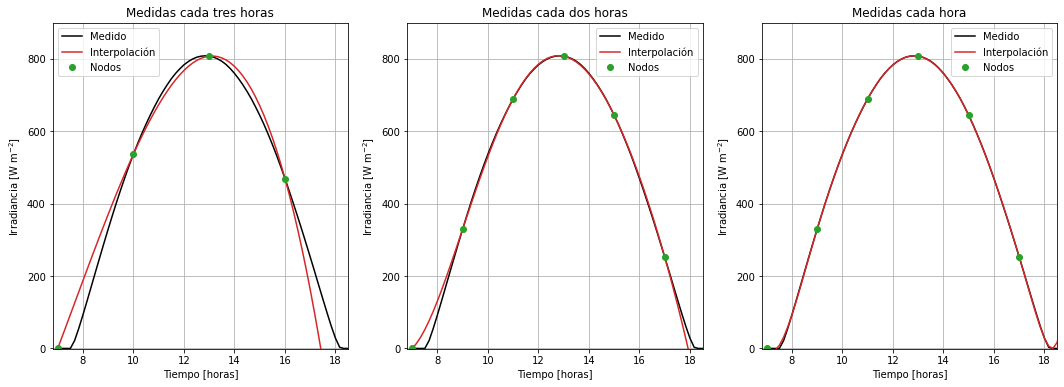

In [ ]:
fig3, ax3 = plt.subplots(1, 3, figsize=(18, 6)) #tres subplots


ax3[0].plot(times, irrad_clear, label="Medido", c='k') #función real (totalidad de los datos)
ax3[0].plot(times, Newton(xnodes, ynodes, times)[0], label="Interpolación", color='tab:red') #interpolacion
ax3[0].plot(xnodes, ynodes, 'o' , label="Nodos",color='tab:green') #nodos
ax3[0].set_xlabel('Tiempo [horas]')
ax3[0].set_ylabel('Irradiancia [W m$^{-2}$]')
ax3[0].set_xlim(6.8, 18.5)
ax3[0].set_ylim(-1, 900)
ax3[0].set_title('Medidas cada tres horas')
ax3[0].legend()
ax3[0].grid()


ax3[1].plot(times, irrad_clear, label="Medido", c='k') #función real (totalidad de los datos)
ax3[1].plot(times, Newton(xnodes2, ynodes2, times)[0], label="Interpolación", color='tab:red') #interpolacion
ax3[1].plot(xnodes2, ynodes2, 'o' , label="Nodos",color='tab:green') #nodos
ax3[1].set_xlabel('Tiempo [horas]')
ax3[1].set_ylabel('Irradiancia [W m$^{-2}$]')
ax3[1].set_xlim(6.8, 18.5)
ax3[1].set_ylim(-1, 900)
ax3[1].set_title('Medidas cada dos horas')
ax3[1].legend()
ax3[1].grid()


ax3[2].plot(times, irrad_clear, label="Medido", c='k') #función real (totalidad de los datos)
ax3[2].plot(times, Newton(xnodes3, ynodes3, times)[0], label="Interpolación", color='tab:red') #interpolacion
ax3[2].plot(xnodes2, ynodes2, 'o' , label="Nodos",color='tab:green') #nodos
ax3[2].set_xlabel('Tiempo [horas]')
ax3[2].set_ylabel('Irradiancia [W m$^{-2}$]')
ax3[2].set_xlim(6.8, 18.5)
ax3[2].set_ylim(-1, 900)
ax3[2].set_title('Medidas cada hora')
ax3[2].legend()
ax3[2].grid()

## Conclusión ##
Como se ha ido comentando en el transcurso del programa, se ha comprobado que a mayor número de nodos, más se ajusta la interpolación a la función real o esperada. Esto no siempre es así, debido a como trabaja el programa en si; un número muy grande de nodos puede dar comportamientos anómalos. \\

Con la aplicación de los métodos de Lagrange y Newton a una función matemática conocida $f(t)$ se pudo comprobar esto por primera vez, así como la unicidad del polinomio interpolador al obtener el mismo resultado por ambos métodos. Con la aplicación de uno de estos métodos a los datos de irradiancia solar, estudiando la interpolación para el aporte de un número de nodos cada vez mayor, se comprobó lo visto para el caso de $f(t)$. \\

Al hacer un estudio numérico del error cometido en ambos casos (quse puede mejorar, comprobamos lo ya visto al hacer la representación gráfica: un mayor número de nodos disminuye el error cometido, sobre todo en la zona central del intervalo. También se observó como el error en la interpolación aumenta en los extremos del intervalo. 